# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [2]:
# loat DBLP dataset into a Pandas dataframe
dblp = pd.read_csv('./data/dblp.tsv', sep='\t')
dblp['authors'] = dblp['authors'].apply(eval)

In [3]:
# take a look at the dataset
dblp.head()

,id,authors,year,title
0,tr/meltdown/s18,"[Paul Kocher, Daniel Genkin, Daniel Gruss, Wer...",2018.0,Spectre Attacks: Exploiting Speculative Execut...
1,tr/meltdown/m18,"[Moritz Lipp, Michael Schwarz 0001, Daniel Gru...",2018.0,Meltdown
2,tr/acm/CS2013,[],2013.0,Computer Science Curricula 2013
3,tr/gte/TR-0263-08-94-165,[Frank Manola],1994.0,An Evaluation of Object-Oriented DBMS Developm...
4,tr/gte/TR-0222-10-92-165,"[Michael L. Brodie, Michael Stonebraker]",1993.0,DARWIN: On the Incremental Migration of Legacy...


In [4]:
# keep only conference papers
conf_papers = dblp[dblp['id'].apply(lambda x: 'conf/' in x)]

In [5]:
# remove papers with empty authors
conf_papers = conf_papers[conf_papers['authors'].apply(lambda x: len(x) > 0)]

In [6]:
# read the selected conferences from list_of_ai_conferences.txt file
# and save it into conferences list
conferences = []
with open('./data/list_of_ai_conferences.txt', 'r') as f:
    for line in f.readlines():
        conferences.append(line.strip('\n'))

# retain only papers from the selected conferences
conf_papers = conf_papers[conf_papers['id'].apply(lambda x: x.split('/')[1] in conferences)].reset_index(drop=True)

# add a new 'conference' column
conf_papers['conference'] = conf_papers['id'].apply(lambda x: x.split('/')[1])
conf_papers.head()

,id,authors,year,title,conference
0,conf/iccv/KunoOO90,"[Yoshinori Kuno, Yasukazu Okamoto, Satoshi Okada]",1990.0,Object recognition using a feature search stra...,iccv
1,conf/iccv/VedulaBRCK99,"[Sundar Vedula, Simon Baker, Peter Rander, Rob...",1999.0,Three-Dimensional Scene Flow.,iccv
2,conf/iccv/MeminP99,"[Étienne Mémin, Patrick Pérez]",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
3,conf/iccv/DickinsonPR90,"[Sven J. Dickinson, Alex Pentland, Azriel Rose...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
4,conf/iccv/SinghYL17,"[Avi Singh, Larry Yang, Sergey Levine]",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv


Overall number of paper in the filtered dataset

In [7]:
conf_papers.shape[0]

101053

The number of paper per conference

In [8]:
conf_papers['conference'].value_counts()

icra      21548
cvpr      12796
aaai      10688
ijcai      9547
nips       8395
acl        6190
icml       4977
iconip     4935
iccv       4158
emnlp      3264
naacl      3216
icann      3101
accv       2352
fgr        1371
pricai     1353
iccbr       838
ida         695
ilp         643
ksem        622
aamas       364
Name: conference, dtype: int64

In [9]:
# Check if any row of the dataframe contains an entry with a missing title
conf_papers.isnull().values.any()

False

### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [10]:
# create a paper-centric df
# split the list-like string in authors, put each of them in a new column (apply.(pd.Series)),
# merge with the paper-centric dataframe, melt the dataframe (--> long dataframe)
# and finally drop the nan when doint apply.(pd.Series)
# conf_authors = (conf_papers['authors']
#                 .apply(lambda x: x.replace('[', '').replace(']', '').replace('\'', '').split(', ')).apply(pd.Series)
#                 .merge(conf_papers, left_index=True, right_index=True)
#                 .drop(['authors'], axis=1)
#                 .melt(id_vars = ['id', 'year', 'title', 'conference'], value_name = "author")
#                 .drop("variable", axis = 1)
#                 .dropna(subset=['author']))

# use more efficient method, explode
conf_authors = conf_papers.explode('authors') \
                          .rename(columns={'authors': 'author'}) \
                          .reset_index(drop=True) \
                          .dropna(subset=['author'])

The number of unique authors

In [11]:
conf_authors['author'].nunique()

105817

In [12]:
# check if the number of papers are equal in these two dataframs
conf_papers.shape[0] == conf_authors['id'].nunique()

True

### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

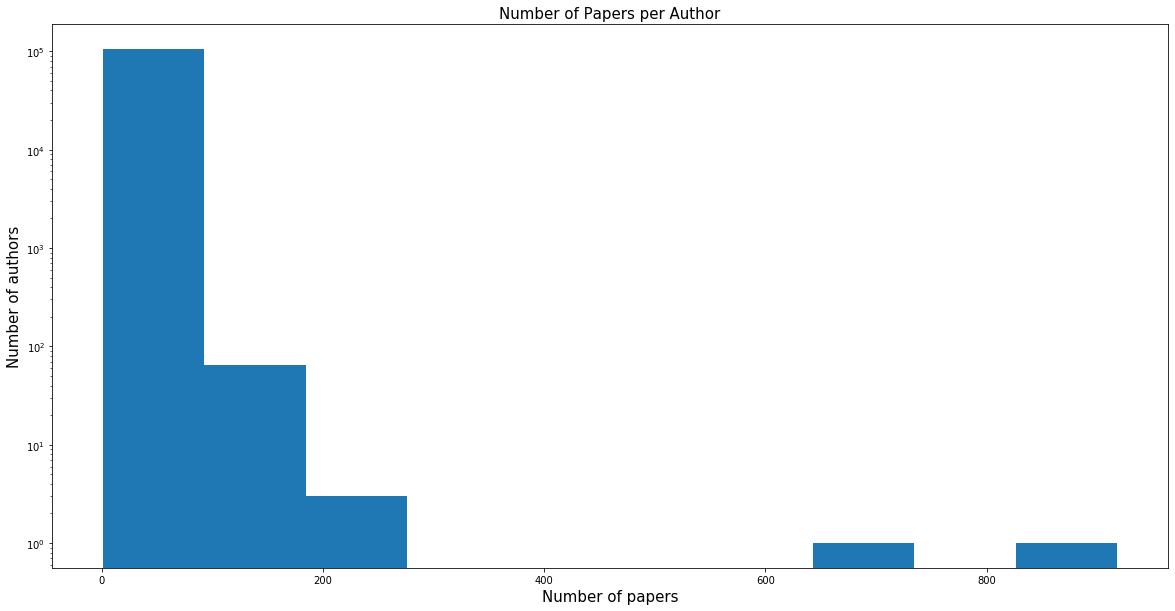

In [13]:
conf_authors['author'].value_counts().plot.hist(figsize=(20, 10), log=True)
plt.title('Number of Papers per Author', fontsize=15)
plt.xlabel('Number of papers', fontsize=15)
plt.ylabel('Number of authors', fontsize=15)
plt.show()

It seems like there are a few outliers who have more papers than others, so we decided to check who are they.

In [14]:
conf_authors.groupby('author').count().drop(['id', 'year', 'conference'], axis=1) \
            .rename(columns={'title': 'number of papers'}) \
            .sort_values(by='number of papers', ascending=False).head(10)

,number of papers
author,
Sheila A. McIlraith,918
Satinder P. Singh (ed.),663
Luc Van Gool,220
Toshio Fukuda,196
Thomas S. Huang,186
Michael I. Jordan,168
Trevor Darrell,158
Shuicheng Yan,154
Takeo Kanade,151


In [15]:
conf_authors.groupby(['year', 'conference', 'author']).count().drop(['id'], axis=1) \
            .rename(columns={'title': 'number of papers'}) \
            .sort_values(by='number of papers', ascending=False).head(10)

number of papers
year   conference author                                   
2018.0 aaai       Sheila A. McIlraith                   890
2017.0 aaai       Satinder P. Singh (ed.)               663
2018.0 cvpr       Luc Van Gool                           19
                  Ming-Hsuan Yang 0001                   15
2017.0 icra       Roland Siegwart                        12
                  Daniela Rus                            12
2011.0 icra       Gerd Hirzinger                         12
2017.0 ijcai      Feiping Nie                            12
1999.0 icra       Toshio Fukuda                          12
2017.0 ijcai      Dacheng Tao                            11

The top two entries is definitely weird. After some research, we found out that they are like the editor of 2018 and 2017 AAAI conferences. Since they are not the actual author of the paper, we should remove their entries in the author-centric dataframe and also their name in the paper-centric dataframe.

We might as well check are there any other authors who have (ed.) in their name (which should indicate they are the editors and not the author)

In [16]:
conf_authors[conf_authors['author'].apply(lambda x: '(ed.)' in x)]

,id,author,year,title,conference
101219,conf/aaai/Harrison-Trainor17,Satinder P. Singh (ed.),2017.0,Preferential Structures for Comparative Probab...,aaai
101372,conf/aaai/LecatLL17,Satinder P. Singh (ed.),2017.0,New Lower Bound for the Minimum Sum Coloring P...,aaai
101382,conf/aaai/ChakrabortiTFCK17,Satinder P. Singh (ed.),2017.0,UbuntuWorld 1.0 LTS - A Platform for Automated...,aaai
101386,conf/aaai/HeP17,Satinder P. Singh (ed.),2017.0,Weakly Supervised Learning of Part Selection M...,aaai
101437,conf/aaai/Luger17,Satinder P. Singh (ed.),2017.0,Beyond Mechanical Turk: Using Techniques from ...,aaai
...,...,...,...,...,...
133722,conf/aaai/SunYZB17,Satinder P. Singh (ed.),2017.0,Exploiting both Vertical and Horizontal Dimens...,aaai
133751,conf/aaai/DerbinskyF17,Satinder P. Singh (ed.),2017.0,Cornhole: A Widely-Accessible AI Robotics Task.,aaai
133811,conf/aaai/OrtizI17,Satinder P. Singh (ed.),2017.0,Tractable Algorithms for Approximate Nash Equi...,aaai
133831,conf/aaai/AsprinoPGC17,Satinder P. Singh (ed.),2017.0,Frame-Based Ontology Alignment.,aaai


Ok, so it's just Satinder P. Singh(ed.), cause the total number is the same.

We should remove the above mentioned outliers.  
For paper-centric dataframe, we should remove their names in the corresponding authors list.  
For author-centric dataframe, we should remove their entries.

In [17]:
removed_ids_sheila = conf_authors[(conf_authors['author'] == 'Sheila A. McIlraith') &
                                  (conf_authors['conference'] == 'aaai') &
                                  (conf_authors['year'] == '2018.0')]['id'].values
removed_ids_satinder = conf_authors[(conf_authors['author'] == 'Satinder P. Singh (ed.)') &
                                    (conf_authors['conference'] == 'aaai') &
                                    (conf_authors['year'] == '2017.0')]['id'].values
def remove_name_in_list(ob):
    # only remove name when paper's id is in removed_ids
    if ob['id'] in removed_ids_sheila:
        ob['authors'] = [a for a in ob['authors'] if a != 'Sheila A. McIlraith']
    if ob['id'] in removed_ids_satinder:
        ob['authors'] = [a for a in ob['authors'] if a != 'Satinder P. Singh (ed.)']
    return ob

In [18]:
a31_conf_papers = conf_papers.copy()
a31_conf_papers = a31_conf_papers.apply(remove_name_in_list, axis=1)

In [19]:
# after the above step there are four additional empty authors entries
a31_conf_papers[a31_conf_papers['authors'].apply(lambda x: len(x) == 0)]

,id,authors,year,title,conference
33867,conf/aaai/2018w,[],2018.0,The Workshops of the The Thirty-Second AAAI Co...,aaai
36715,conf/aaai/2017,[],2017.0,Proceedings of the Thirty-First AAAI Conferenc...,aaai
37975,conf/aaai/2017w,[],2017.0,The Workshops of the The Thirty-First AAAI Con...,aaai
38652,conf/aaai/2018,[],2018.0,Proceedings of the Thirty-Second AAAI Conferen...,aaai


In [20]:
# remove entries empty authors list
a31_conf_papers = a31_conf_papers[a31_conf_papers['authors'].apply(lambda x: len(x) > 0)]

In [21]:
a31_conf_authors = conf_authors[~((conf_authors['author'] == 'Sheila A. McIlraith') &
                                  (conf_authors['conference'] == 'aaai') &
                                  (conf_authors['year'] == '2018.0') |
                                  ((conf_authors['author'] == 'Satinder P. Singh (ed.)') &
                                   (conf_authors['conference'] == 'aaai') &
                                   (conf_authors['year'] == '2017.0')))]

In [22]:
# check if the number of papers are equal in these two dataframs
a31_conf_papers.shape[0] == a31_conf_authors['id'].nunique()

True

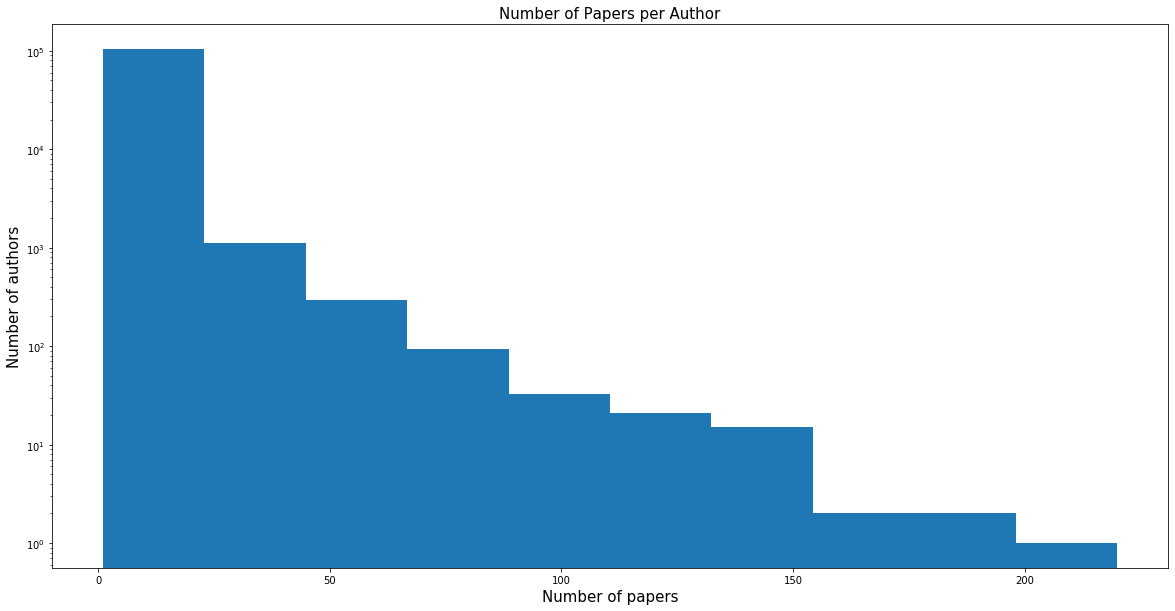

In [23]:
# plot the number of papers per author
a31_conf_authors['author'].value_counts().plot.hist(figsize=(20, 10), log=True)
plt.title('Number of Papers per Author', fontsize=15)
plt.xlabel('Number of papers', fontsize=15)
plt.ylabel('Number of authors', fontsize=15)
plt.show()

***A3.2***

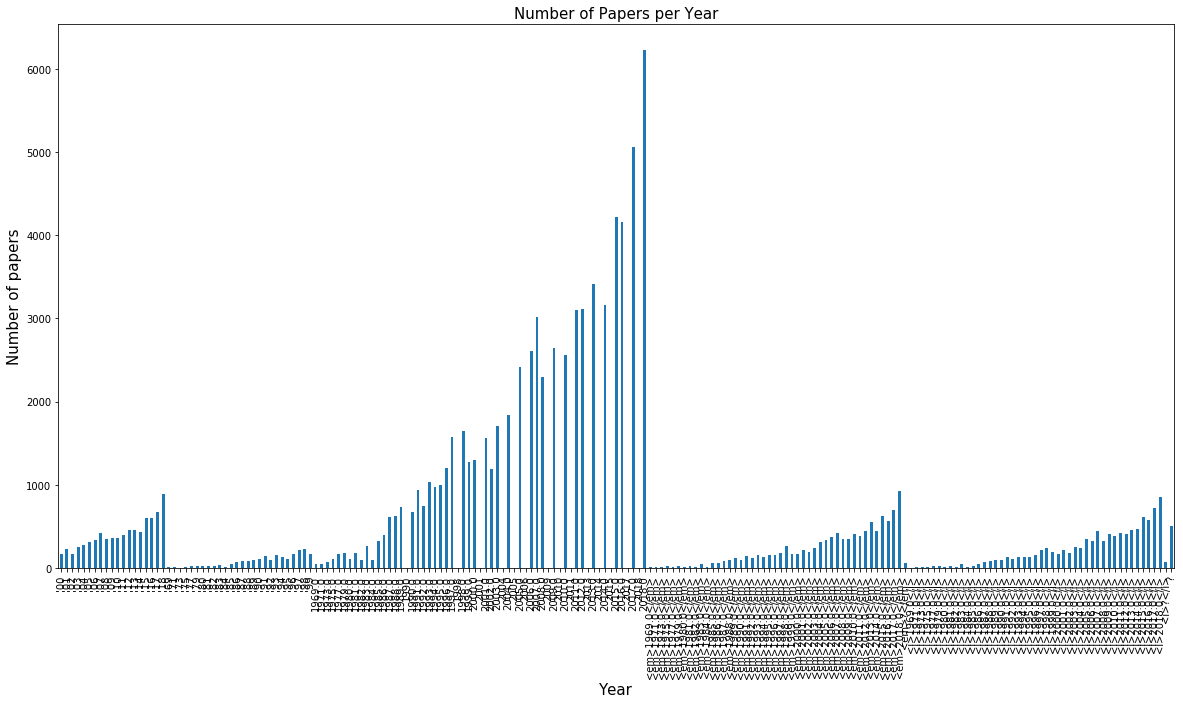

In [24]:
a31_conf_papers['year'].value_counts().sort_index().plot.bar(figsize=(20, 10))
plt.title('Number of Papers per Year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of papers', fontsize=15)
plt.show()

The labels (x-axis) are clearly not all numbers, let's check what are the problems.

In [25]:
a31_conf_papers['year'].value_counts().index.values

array(['2018.0', '2017.0', '2015.0', '2016.0', '2013.0', '2014.0',
       '2012.0', '2011.0', '2007.0', '2009.0', '2006.0', '2010.0',
       '2005.0', '2008.0', '2004.0', '2003.0', '1998.0', '1997.0',
       '2001.0', '2000.0', '1999.0', '1996.0', '2002.0', '1993.0',
       '1995.0', '1994.0', '1991.0', '<em>2018.0</em>', "'18",
       '<i>2018.0</i>', '1992.0', '1989.0', '<i>2017.0</i>',
       '<em>2017.0</em>', "'17", '1990.0', '<em>2015.0</em>', '1988.0',
       '<i>2015.0</i>', '1987.0', "'15", "'16", '<i>2016.0</i>',
       '<em>2016.0</em>', '<em>2013.0</em>', '?', '<i>2014.0</i>', "'12",
       '<i>2013.0</i>', "'13", '<i>2007.0</i>', '<em>2014.0</em>',
       '<em>2012.0</em>', "'14", '<em>2007.0</em>', '<i>2011.0</i>',
       "'07", '<i>2012.0</i>', '<em>2010.0</em>', '<i>2009.0</i>', "'11",
       '1986.0', '<em>2011.0</em>', '<i>2010.0</i>', '<em>2006.0</em>',
       "'10", "'09", '<em>2009.0</em>', '<em>2008.0</em>', "'08",
       '<i>2005.0</i>', "'06", '<em>2005.0</em>',

There are several problems.

First, there are some values in column year that do not just contain number but some invalid string (e.g. \<i>, \<em>).  
Second, some values are int values and some are float values (e.g. 2017, 2017.0).  
Third, some values only contain the last two digit or the last digit of the year (e.g. '71, '73).  
Last, there are some ? year.

We need to fix these problems.

In [26]:
def handle_errors(x, invalid_string):
    # remove invalid string
    x = x.strip()
    for tag in invalid_string:
        x = x.replace(tag, '')
    # handle ? year, we set it to nan now and will fill in the value in the next A3.4
    if x == '?':
        x = np.nan
    else:
        # make every year into a float value
        x = float(x)
    # convert it into four digits number
    if x < 100:
        # we set <19 because the newest paper is from 2018
        if x < 19:
            x += 2000
        else:
            x += 1900
    return x

invalid_string = ['<i>', '</i>', '<em>', '</em>', '\'']
a32_conf_papers = a31_conf_papers.copy()
a32_conf_papers['year'] = a31_conf_papers['year'].apply(handle_errors, invalid_string=invalid_string)

In [27]:
# apply the same function to new_conf_authors
a32_conf_authors = a31_conf_authors.copy()
a32_conf_authors['year'] = a31_conf_authors['year'].apply(handle_errors, invalid_string=invalid_string)

In [28]:
# check if the number of papers are equal in these two dataframs 
a32_conf_papers.shape[0] == a32_conf_authors['id'].unique().size

True

In [29]:
# check the modified year value
a32_conf_papers['year'].value_counts().index.values

array([2018., 2017., 2015., 2016., 2013., 2014., 2012., 2011., 2007.,
       2009., 2010., 2006., 2005., 2008., 2004., 2003., 1998., 2001.,
       1997., 2000., 1999., 2002., 1996., 1993., 1995., 1994., 1991.,
       1992., 1989., 1990., 1988., 1987., 1986., 1985., 1983., 1981.,
       1979., 1977., 1975., 1984., 1982., 1980., 1973., 1971., 1969.])

There must be some problems for the ? year (now we get 630 papers with ? year which we turned it into NaN).

In [30]:
a32_conf_papers[a32_conf_papers['year'].isna()]

,id,authors,year,title,conference
61568,conf/nips/WangSJ11,"[Zuoguan Wang, Gerwin Schalk, Qiang Ji]",NaN,Anatomically Constrained Decoding of Finger Fl...,nips
61596,conf/nips/BachM10,"[Stephen H. Bach, Marcus A. Maloof]",NaN,A Bayesian Approach to Concept Drift.,nips
61600,conf/nips/RamkumarPHLL11,"[Pavan Ramkumar, Sebastian Pannasch, Bruce C. ...",NaN,How Does the Brain Represent Visual Scenes? A ...,nips
61611,conf/nips/KolarBRS11,"[Mladen Kolar, Sivaraman Balakrishnan, Alessan...",NaN,Minimax Localization of Structural Information...,nips
61628,conf/nips/LempitskyZ10,"[Victor S. Lempitsky, Andrew Zisserman]",NaN,Learning To Count Objects in Images.,nips
...,...,...,...,...,...
69901,conf/nips/WangLSDC10,"[Eric Wang, Dehong Liu, Jorge G. Silva, David ...",NaN,Joint Analysis of Time-Evolving Binary Matrice...,nips
69913,conf/nips/FroyenFS10,"[Vicky Froyen, Jacob Feldman, Manish Singh 0001]",NaN,A Bayesian Framework for Figure-Ground Interpr...,nips
69924,conf/nips/BellalaBS10,"[Gowtham Bellala, Suresh K. Bhavnani, Clayton ...",NaN,Extensions of Generalized Binary Search to Gro...,nips
69939,conf/nips/AndersenMSHM11,"[Kasper Winther Andersen, Kristoffer Hougaard ...",NaN,Identification of Functional Clusters in the S...,nips


***A3.3***

In [31]:
mlconf = ['icml', 'nips']
ml_papers = a32_conf_papers[a32_conf_papers['conference'].isin(mlconf)]

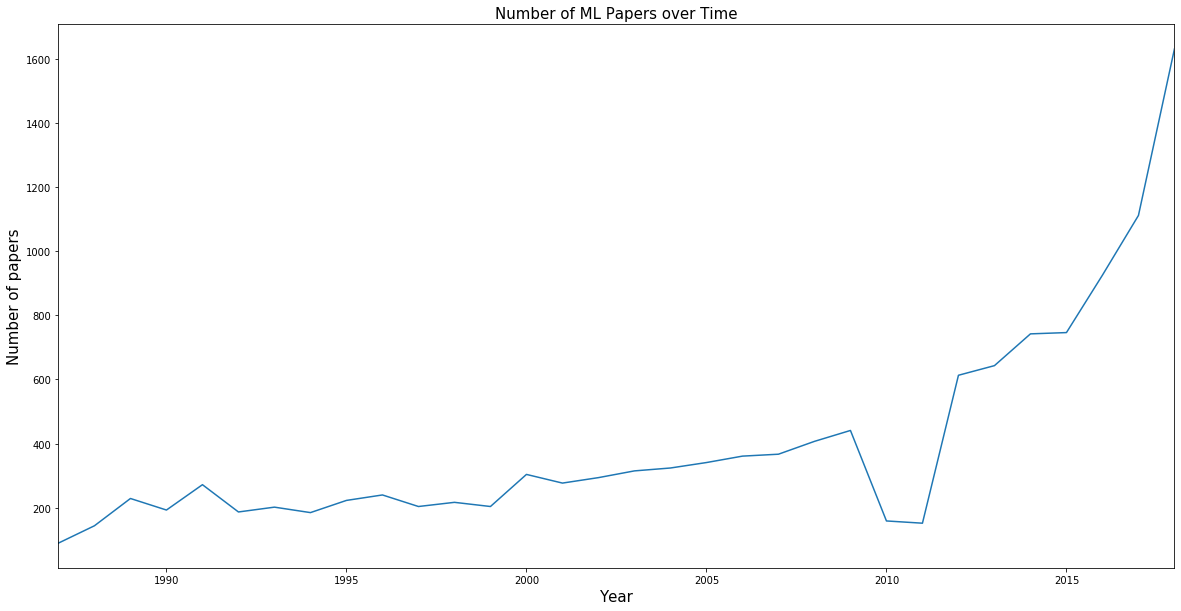

In [32]:
ml_papers['year'].value_counts().sort_index().plot(figsize=(20, 10))
plt.title('Number of ML Papers over Time', fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of papers", fontsize=15)
plt.show()

There is something odd. The number of papers drops about 200 at around 2010 and 2011. Let's find out what is causing this (we guessed that it could be the '?' year).

In [33]:
# check the number of data which has '?' year
ml_papers[ml_papers['year'] != ml_papers['year']]

,id,authors,year,title,conference
61568,conf/nips/WangSJ11,"[Zuoguan Wang, Gerwin Schalk, Qiang Ji]",NaN,Anatomically Constrained Decoding of Finger Fl...,nips
61596,conf/nips/BachM10,"[Stephen H. Bach, Marcus A. Maloof]",NaN,A Bayesian Approach to Concept Drift.,nips
61600,conf/nips/RamkumarPHLL11,"[Pavan Ramkumar, Sebastian Pannasch, Bruce C. ...",NaN,How Does the Brain Represent Visual Scenes? A ...,nips
61611,conf/nips/KolarBRS11,"[Mladen Kolar, Sivaraman Balakrishnan, Alessan...",NaN,Minimax Localization of Structural Information...,nips
61628,conf/nips/LempitskyZ10,"[Victor S. Lempitsky, Andrew Zisserman]",NaN,Learning To Count Objects in Images.,nips
...,...,...,...,...,...
69901,conf/nips/WangLSDC10,"[Eric Wang, Dehong Liu, Jorge G. Silva, David ...",NaN,Joint Analysis of Time-Evolving Binary Matrice...,nips
69913,conf/nips/FroyenFS10,"[Vicky Froyen, Jacob Feldman, Manish Singh 0001]",NaN,A Bayesian Framework for Figure-Ground Interpr...,nips
69924,conf/nips/BellalaBS10,"[Gowtham Bellala, Suresh K. Bhavnani, Clayton ...",NaN,Extensions of Generalized Binary Search to Gro...,nips
69939,conf/nips/AndersenMSHM11,"[Kasper Winther Andersen, Kristoffer Hougaard ...",NaN,Identification of Functional Clusters in the S...,nips


In [34]:
# check how many are from 2010 and 2011 nips
ml_papers[ml_papers['year'] != ml_papers['year']][ml_papers[ml_papers['year'] != ml_papers['year']]['id']
                                                  .apply(lambda x: '11' in x or '10' in x or '09' in x and 'nips' in x).values]

,id,authors,year,title,conference
61568,conf/nips/WangSJ11,"[Zuoguan Wang, Gerwin Schalk, Qiang Ji]",NaN,Anatomically Constrained Decoding of Finger Fl...,nips
61596,conf/nips/BachM10,"[Stephen H. Bach, Marcus A. Maloof]",NaN,A Bayesian Approach to Concept Drift.,nips
61600,conf/nips/RamkumarPHLL11,"[Pavan Ramkumar, Sebastian Pannasch, Bruce C. ...",NaN,How Does the Brain Represent Visual Scenes? A ...,nips
61611,conf/nips/KolarBRS11,"[Mladen Kolar, Sivaraman Balakrishnan, Alessan...",NaN,Minimax Localization of Structural Information...,nips
61628,conf/nips/LempitskyZ10,"[Victor S. Lempitsky, Andrew Zisserman]",NaN,Learning To Count Objects in Images.,nips
...,...,...,...,...,...
69901,conf/nips/WangLSDC10,"[Eric Wang, Dehong Liu, Jorge G. Silva, David ...",NaN,Joint Analysis of Time-Evolving Binary Matrice...,nips
69913,conf/nips/FroyenFS10,"[Vicky Froyen, Jacob Feldman, Manish Singh 0001]",NaN,A Bayesian Framework for Figure-Ground Interpr...,nips
69924,conf/nips/BellalaBS10,"[Gowtham Bellala, Suresh K. Bhavnani, Clayton ...",NaN,Extensions of Generalized Binary Search to Gro...,nips
69939,conf/nips/AndersenMSHM11,"[Kasper Winther Andersen, Kristoffer Hougaard ...",NaN,Identification of Functional Clusters in the S...,nips


It turns out that the papers which have '?' year we previously set to NaN are all 2010 and 2011 nips papers. We'll fix it in the next section.

***A3.4***

In [35]:
# initiate BeautifulSoup
base_url = 'https://papers.nips.cc/'
r = get(base_url)
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

In [36]:
# find tags with href including /book/
nips_a = soup.find_all(href=re.compile('/book/'))
nips_links = []
# only get links of 2011 and 2010
for nips_a in nips_a[7:9]:
    nips_links.append(base_url + nips_a['href'][1:])

In [37]:
nips_papers_list = []
id_list = []
year = 2011
for link in nips_links:
    # initiate BeautifulSoup for website of each year's nips
    r = get(link)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    # skip the first one since it's actually not a paper entry
    all_papers_li = soup.find_all('li')[1:]
    for papers_li in all_papers_li:
        # find tags with href including /paper/ and get the title text
        title = papers_li.find(href=re.compile('/paper/')).text
        # find all anchor tags with class as author
        authors_a = papers_li.find_all('a', class_='author')
        # construct authors' list
        authors = [author.text for author in authors_a]
        # create id following how dblp does it
        if len(authors) != 0:
            idx = ''.join(['conf/nips/', authors[0].split(' ')[-1]] + [author.split(' ')[-1][0] for author in authors[1:]] + [str(year)[-2:]])
        else: # this is for paper with no author, will remove these afterward
            idx = 'conf/nips/'
        # handle duplicate idx (we realized there will be some papers which were written by the same authors in a year 
        # when building a new papers and authors df, so we must create a distinct id for that. We check how dblp does
        # it. The following block shows one example.)
        if idx in id_list:
            if ord(idx[-1]) >= 97:
                idx[-1] = chr(ord(idx[-1]) + 1)
            else:
                idx += 'a'
        # don't bother paper with no author
        if len(authors) != 0:
            id_list.append(idx)
        nips_papers_list.append({
            'id': idx,
            'authors': authors,
            'year': year,
            'title': title,
            'conference': 'nips'
        })
    year -= 1

In [38]:
# two papers with the same authors and yaer
ml_papers[ml_papers['id'].apply(lambda x: 'conf/nips/ZhouYF18' in x)]

,id,authors,year,title,conference
62836,conf/nips/ZhouYF18a,"[Pan Zhou, Xiaotong Yuan, Jiashi Feng]",2018.0,Efficient Stochastic Gradient Hard Thresholding.,nips
66308,conf/nips/ZhouYF18,"[Pan Zhou, Xiaotong Yuan, Jiashi Feng]",2018.0,New Insight into Hybrid Stochastic Gradient De...,nips


In [39]:
# create a pandas dataframe for the new nips data
nips_papers = pd.DataFrame.from_dict(nips_papers_list)
# remove paper with no author
nips_papers = nips_papers[nips_papers['id'] != 'conf/nips/']

In [40]:
import unicodedata
from string import punctuation
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])
def remove_accent(text):
    return unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")

In [41]:
def fill_missing_value(x):
    x_id = x['id']
    target_entry = nips_papers[nips_papers['id'] == x_id]
    if target_entry.empty:
        x_title = remove_accent(remove_punct(x['title']))
        target_entry = nips_papers[nips_papers['title'].apply(lambda y: remove_accent(remove_punct(y)) == x_title)]
    if not target_entry.empty:
        x['year'] = target_entry['year'].values[0]
    return x

a34_conf_papers = a32_conf_papers.copy()
a34_conf_papers[a34_conf_papers.isna().any(axis=1)] = a34_conf_papers[a34_conf_papers.isna().any(axis=1)].apply(fill_missing_value, axis=1)

In [42]:
a34_conf_papers[a34_conf_papers.isna().any(axis=1)]

,id,authors,year,title,conference
61600,conf/nips/RamkumarPHLL11,"[Pavan Ramkumar, Sebastian Pannasch, Bruce C. ...",NaN,How Does the Brain Represent Visual Scenes? A ...,nips
61777,conf/nips/KwokCCMA11,"[Philip P. Kwok, Olga Ciccarelli, Declan T. Ch...",NaN,Predicting Clinically Definite Multiple Sclero...,nips
61899,conf/nips/ChangMJ11,"[Kai-min Kevin Chang, Brian Murphy, Marcel Ada...",NaN,A Latent Feature Analysis of the Neural Repres...,nips
62248,conf/nips/BahramisharifGSGH11,"[Ali Bahramisharif, Marcel A. J. van Gerven, J...",NaN,The Dynamic Beamformer.,nips
62757,conf/nips/GramfortVT11,"[Alexandre Gramfort, Gaël Varoquaux, Bertrand ...",NaN,Beyond Brain Reading: Randomized Sparsity and ...,nips
62764,conf/nips/HaufeNNM11,"[Stefan Haufe, Vadim V. Nikulin, Guido Nolte, ...",NaN,Pitfalls in EEG-Based Brain Effective Connecti...,nips
63211,conf/nips/BiessmannMLMM11,"[Felix Bießmann, Yusuke Murayama, Nikos K. Log...",NaN,Non-separable Spatiotemporal Brain Hemodynamic...,nips
63293,conf/nips/DeligianniVTRSER11,"[Fani Deligianni, Gaël Varoquaux, Bertrand Thi...",NaN,Relating Brain Functional Connectivity to Anat...,nips
63883,conf/nips/MichelGEVT11,"[Vincent Michel, Alexandre Gramfort, Evelyn Eg...",NaN,A Comparative Study of Algorithms for Intra- a...,nips
64004,conf/nips/HansenHM11,"[Toke Jansen Hansen, Lars Kai Hansen, Kristoff...",NaN,Decoding Complex Cognitive States Online by Ma...,nips


In [43]:
a34_conf_papers[a34_conf_papers.isna().any(axis=1)].shape[0]

32

There are still 32 papers with missing year, we'll remove them.  
We check most of the papers, they are not in this nips, but is in Machine Learning and Interpretation in Neuroimaging, which also has the abbreviation of nips.

In [44]:
a34_conf_papers.dropna(inplace=True)

In [45]:
# recreate the author-centric dataframe
a34_conf_authors = (a34_conf_papers
                    .explode('authors')
                    .rename(columns={'authors': 'author'})
                    .reset_index(drop=True)
                    .dropna(subset=['author']))

In [46]:
# check if the number of papers are equal in these two dataframs
a34_conf_papers.shape[0] == a34_conf_authors['id'].nunique()

True

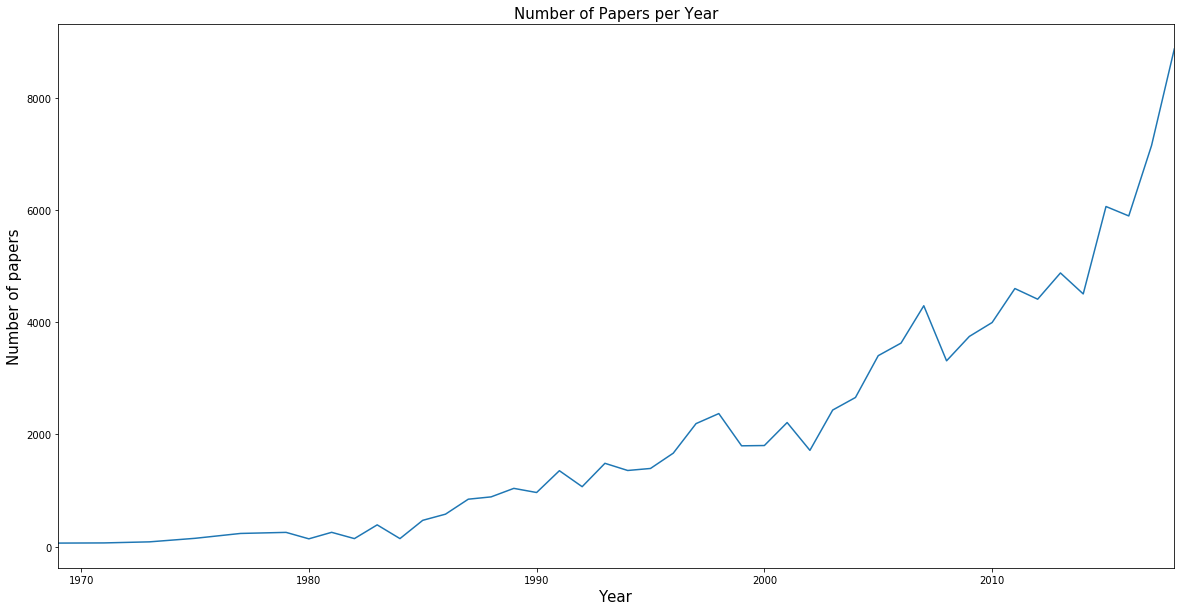

In [47]:
# redo A3.2
a34_conf_papers['year'].value_counts().sort_index().plot(figsize=(20, 10))
plt.title('Number of Papers per Year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of papers', fontsize=15)
plt.show()

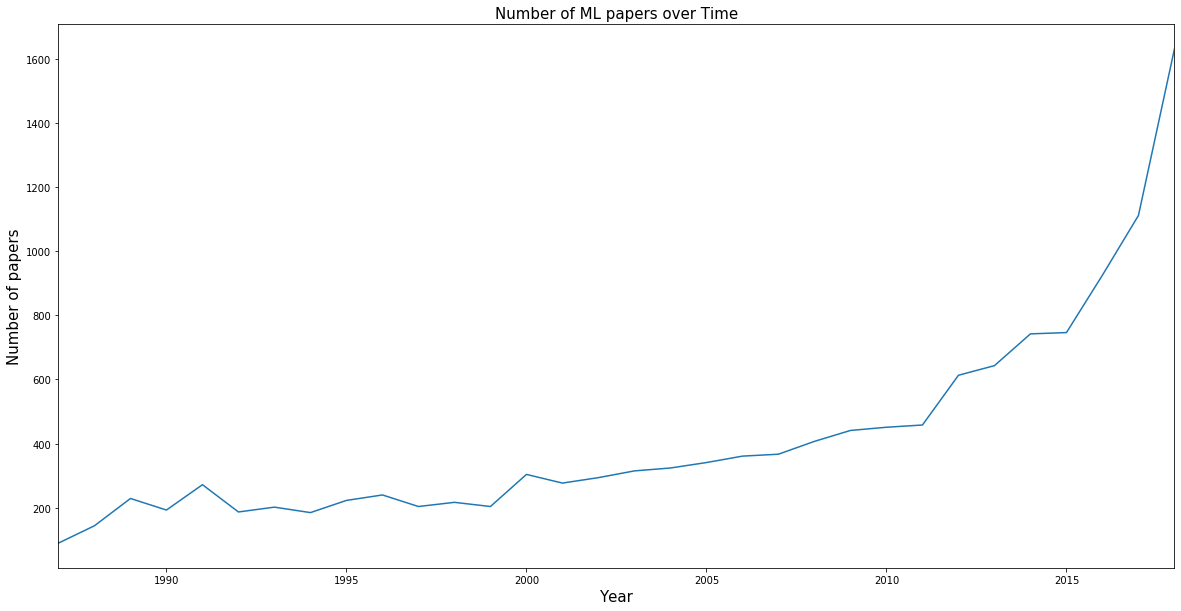

In [48]:
# redo A3.3
ml_papers = a34_conf_papers[a34_conf_papers['conference'].isin(mlconf)]
ml_papers['year'].value_counts().sort_index().plot(figsize=(20, 10))
plt.title('Number of ML papers over Time', fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of papers", fontsize=15)
plt.show()

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [49]:
def compute_activity(years):
    years = years.values
    return max(years) - min(years) + 1
authors_activity = a34_conf_authors.groupby('author')['year'].apply(compute_activity)
normalized_paper_count = a34_conf_authors.groupby('author')['title'].count() / authors_activity

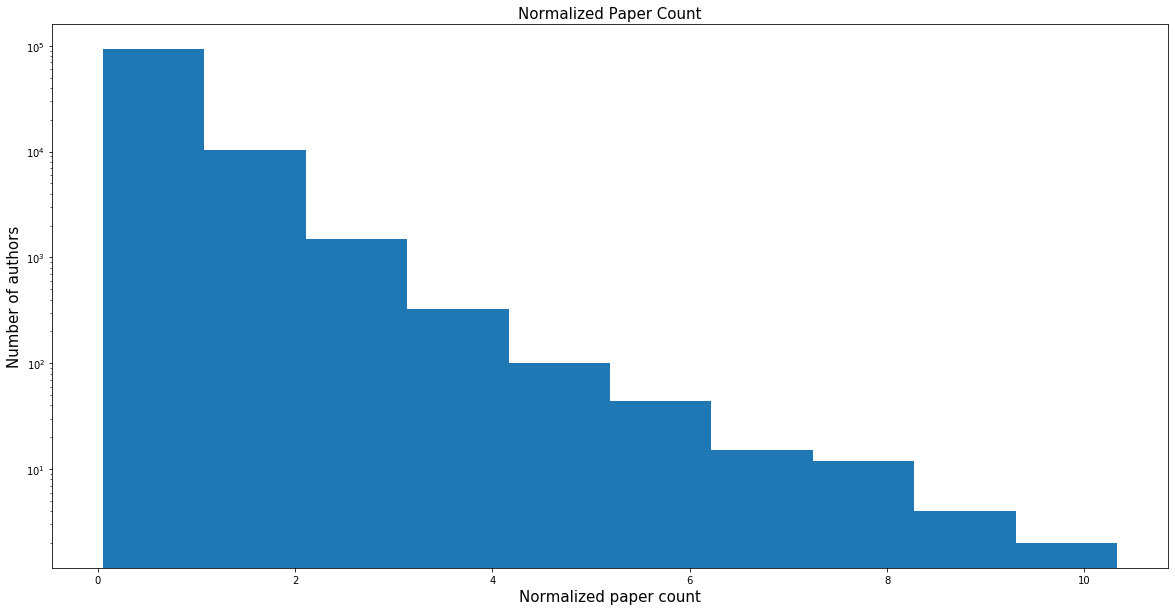

In [50]:
plt.figure(figsize=(20, 10))
plt.hist(normalized_paper_count, log=True, bins=10)
plt.title('Normalized Paper Count', fontsize=15)
plt.xlabel('Normalized paper count', fontsize=15)
plt.ylabel('Number of authors', fontsize=15)
plt.show()

It roughly follows an exponential distribution.

In [51]:
# convert year value to integer
a34_conf_papers['year'] = a34_conf_papers['year'].apply(lambda x: int(x))
a34_conf_authors['year'] = a34_conf_authors['year'].apply(lambda x: int(x))

# save paper-centric and author-centric df
a34_conf_papers.to_pickle('./data/conf_papers.pkl')
a34_conf_authors.to_pickle('./data/conf_authors.pkl')

In [52]:
new_conf_papers = pd.read_pickle('./data/conf_papers.pkl')
new_conf_authors = pd.read_pickle('./data/conf_authors.pkl')

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [53]:
naive_rank = new_conf_authors['author'].value_counts().to_frame().reset_index() \
                                       .rename(columns={'index': 'author', 'author': 'score'})
naive_rank.index += 1
naive_rank.index.name = 'rank'

In [54]:
naive_rank.head()

,author,score
rank,,
1,Luc Van Gool,220
2,Toshio Fukuda,196
3,Thomas S. Huang,186
4,Michael I. Jordan,168
5,Trevor Darrell,158


In [55]:
naive_rank.tail()

,author,score
rank,,
105749,Julita Vassileva,1
105750,Manel Tagorti,1
105751,Chunfeng Shen,1
105752,Anitha Edison,1
105753,Thomas Reinartz,1


In [56]:
print('Number of author who has 1 paper:', naive_rank[naive_rank['score'] == 1].shape[0])
print('Number of author who has 2 paper:', naive_rank[naive_rank['score'] == 2].shape[0])

Number of author who has 1 paper: 63019
Number of author who has 2 paper: 16826


There are quite a lot author who has 1 or 2 papers. We can't really decide their ranking.  
Also, we don't know which conferences or journals they submitted to. Some conferences and journals are more impactful than others.

### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [57]:
# load AMiner dataset and remove entry with no Short Name (nan)
aminer = pd.read_csv('./data/aminer_ai.csv', sep=';').dropna()
aminer['Short Name'] = aminer['Short Name'].apply(lambda x: x.lower())
aminer

,Rank,Conference (Full Name),Short Name,H5-Index
0,1,IEEE Conference on Computer Vision and Pattern...,cvpr,112
1,2,IEEE Transactions on Pattern Analysis and Mach...,tpami,101
2,3,Expert Systems with Applications,expert syst. appl.,59
3,4,International Journal of Computer Vision,ijcv,58
4,5,IEEE International Conference on Robotics and ...,icra,58
...,...,...,...,...
92,93,ACM Transactions on Asian Language Information...,talip,3
93,94,Autonomous Agents and Multi-Agent Systems,aamas,1
94,95,International Conference on Automatic Face and...,fgr,1
95,96,Knowledge-Based Systems,kbs,0


In [58]:
aminer[aminer['Short Name'].duplicated(keep=False)]

,Rank,Conference (Full Name),Short Name,H5-Index
15,16,Decision Support Systems,dss,43
19,20,Autonomous Agents and Multi-Agent Systems,aamas,36
40,41,Autonomous Agents and Multi-Agent Systems,aamas,23
42,43,Neural Computing & Applications,nca,22
71,72,Neural Computing & Applications,nca,10
73,74,Decision Support Systems,dss,10
93,94,Autonomous Agents and Multi-Agent Systems,aamas,1


There are some duplicate conferences in this data. We decided to keep the first entries of them.

In [59]:
aminer.drop_duplicates(subset='Short Name', keep='first', inplace=True)

In [60]:
h5_conf_authors = new_conf_authors.merge(aminer, left_on='conference', right_on='Short Name') \
                                  .drop(['Rank', 'Conference (Full Name)', 'Short Name'], axis=1) \
                                  .rename(columns={'H5-Index': 'h5'})
h5_conf_authors

,id,author,year,title,conference,h5
0,conf/iccv/KunoOO90,Yoshinori Kuno,1990,Object recognition using a feature search stra...,iccv,58
1,conf/iccv/KunoOO90,Yasukazu Okamoto,1990,Object recognition using a feature search stra...,iccv,58
2,conf/iccv/KunoOO90,Satoshi Okada,1990,Object recognition using a feature search stra...,iccv,58
3,conf/iccv/VedulaBRCK99,Sundar Vedula,1999,Three-Dimensional Scene Flow.,iccv,58
4,conf/iccv/VedulaBRCK99,Simon Baker,1999,Three-Dimensional Scene Flow.,iccv,58
...,...,...,...,...,...,...
308860,conf/acl/SalleVI16,Aline Villavicencio,2016,Matrix Factorization using Window Sampling and...,acl,48
308861,conf/acl/SalleVI16,Marco Idiart,2016,Matrix Factorization using Window Sampling and...,acl,48
308862,conf/acl/AnanthakrishnanPN11,Sankaranarayanan Ananthakrishnan,2011,On-line Language Model Biasing for Statistical...,acl,48
308863,conf/acl/AnanthakrishnanPN11,Rohit Prasad,2011,On-line Language Model Biasing for Statistical...,acl,48


***B2.2***

In [61]:
h5_rank = h5_conf_authors.groupby('author').sum().drop(['year'], axis=1) \
                         .sort_values(by='h5', ascending=False).reset_index()
h5_rank.index += 1
h5_rank.index.name = 'rank'

In [62]:
h5_rank.head()

,author,h5
rank,,
1,Luc Van Gool,18695
2,Thomas S. Huang,14052
3,Xiaoou Tang,13190
4,Trevor Darrell,12763
5,Shuicheng Yan,12448


In [63]:
h5_rank.tail()

,author,h5
rank,,
105749,Raffaele Tavarone,1
105750,Jiangning Gao,1
105751,Y. Ivette Colon,1
105752,Douglas Chai,1
105753,Mohammad Iftekhar Tanveer,1


***B2.3***

In [64]:
naive_h5_rank = naive_rank.reset_index().merge(h5_rank.reset_index(), on='author', suffixes=('_in_naive', '_in_h5')) \
                          .rename(columns={'score': 'naive'})
naive_h5_rank = naive_h5_rank[['author', 'rank_in_naive', 'naive', 'rank_in_h5', 'h5']]

In [65]:
naive_h5_rank.sort_values(by='naive', ascending=False).head(10)

,author,rank_in_naive,naive,rank_in_h5,h5
0,Luc Van Gool,1,220,1,18695
1,Toshio Fukuda,2,196,6,11368
2,Thomas S. Huang,3,186,2,14052
3,Michael I. Jordan,4,168,20,8890
4,Trevor Darrell,5,158,4,12763
5,Shuicheng Yan,6,154,5,12448
6,Takeo Kanade,7,151,10,10569
7,Xiaoou Tang,8,150,3,13190
8,Dan Roth,9,144,61,5933
9,Vijay Kumar 0001,10,143,24,8334


In [66]:
naive_h5_rank.sort_values(by='h5', ascending=False).head(10)

,author,rank_in_naive,naive,rank_in_h5,h5
0,Luc Van Gool,1,220,1,18695
2,Thomas S. Huang,3,186,2,14052
7,Xiaoou Tang,8,150,3,13190
4,Trevor Darrell,5,158,4,12763
5,Shuicheng Yan,6,154,5,12448
1,Toshio Fukuda,2,196,6,11368
14,Marc Pollefeys,15,136,7,11265
10,Larry S. Davis,11,143,8,11141
16,Martial Hebert,17,135,9,10629
6,Takeo Kanade,7,151,10,10569


Yes, these two rankings are different. We think the reason why this happens is kind of the reason we predicted in B1. Some conferences and journals are more impactful than others. if you publish a lot of papers in not so impactful (low h5-index score), you will get a high ranking in the naive ranking, but not in the h5-index ranking.

In [67]:
# find out authors that are ranked in the top 20 based on publication counts
# but absent in the top 20 based on the H5-index-based ranking
print('Authors who are not in top 20 of the new h5-index-based ranking:\n')
for name in naive_rank.head(20)['author']:
    if name not in h5_rank.head(20)['author'].values:
        print("{}. Rank {} in the new h5 ranking.".format(name, h5_rank[h5_rank['author'] == name].index.values[0] + 1))

Authors who are not in top 20 of the new h5-index-based ranking:

Dan Roth. Rank 62 in the new h5 ranking.
Vijay Kumar 0001. Rank 25 in the new h5 ranking.
Wolfram Burgard. Rank 32 in the new h5 ranking.
Eric P. Xing. Rank 34 in the new h5 ranking.
Roland Siegwart. Rank 29 in the new h5 ranking.
Christopher D. Manning. Rank 68 in the new h5 ranking.
Dan Klein. Rank 86 in the new h5 ranking.
Bernhard Schölkopf. Rank 40 in the new h5 ranking.


***B2.4***

In [68]:
# read the selected authors from list_of_selected_authors.txt file
# and save it into selected_authors list
selected_authors = []
with open('./data/list_of_selected_authors.txt', 'r') as f:
    for line in f.readlines():
        selected_authors.append(line.strip('\n'))

In [69]:
naive_h5_rank[naive_h5_rank['author'].isin(selected_authors)]

,author,rank_in_naive,naive,rank_in_h5,h5
2376,Hy Murveit,2377,17,19598,170
3725,Mengjie Zhang,3726,13,22655,140
4375,Naokazu Yokoya,4376,11,21030,158
5044,Jianwu Dang,5045,10,24298,122
5228,Sebastian Otte,5229,10,22001,148
29106,Iljung S. Kwak,29107,2,19915,170
30375,Yukihiro Nakamura,30376,2,19883,170
32025,Parag Havaldar,32026,2,19672,170
34923,Steffen Abraham,34924,2,19783,170
42126,Charles Freundlich,42127,2,19379,170


We've observed that people who rank higher in naive ranking could rank lower in H5-index ranking.  
For example, Hy Murveit rank 2462 in naive ranking, but rank 19598 in H5-index ranking.

And people who rank lower in naive ranking could rank higher in H5-index ranking.
For example, Charles Freundlich rank 30108 in naive ranking, but rank 19379 in H5-index ranking.

Therefore, naïve, paper-count-based score is not reliable, because it doesn't take the importance of conferences and journals into consideration. If someone submit lots of paper in a less important conference, he will get a higher rank in this naive ranking with less impact than people who submit less paper but submit in a more important conference.

***B2.5***

In [70]:
h5_rank.head()

,author,h5
rank,,
1,Luc Van Gool,18695
2,Thomas S. Huang,14052
3,Xiaoou Tang,13190
4,Trevor Darrell,12763
5,Shuicheng Yan,12448


In [71]:
new_conf_authors[new_conf_authors['author'] == 'Luc Van Gool'].groupby('conference')['title'] \
                                                              .count().sort_values(ascending=False).to_frame() \
                                                              .rename(columns={'title': 'number of papers'})

,number of papers
conference,
cvpr,132
iccv,46
accv,16
icra,10
nips,6
fgr,5
aaai,3
icml,1
icann,1


In [72]:
new_conf_authors[new_conf_authors['author'].isin(h5_rank.head(5)['author'])] \
    .groupby(['author', 'conference']) \
    .count() \
    .drop(['id', 'year'], axis=1) \
    .rename(columns={'title': 'number of papers'}) \
    .sort_values(by='number of papers', ascending=False) \
    .head(10)

,,number of papers
author,conference,
Luc Van Gool,cvpr,132
Thomas S. Huang,cvpr,98
Xiaoou Tang,cvpr,90
Shuicheng Yan,cvpr,79
Trevor Darrell,cvpr,77
Luc Van Gool,iccv,46
Xiaoou Tang,iccv,39
Thomas S. Huang,iccv,33
Shuicheng Yan,iccv,31


We picked the number one ranked author Luc Van Gool. The top two conferences he published on are cvpr and iccv. They are all computer vision related conferences.

We also checked where do the top 5 ranked authors publish most. We found out that it is mostly dominate by cvpr and iccv again.

We thinked the potential danger of H5-index-based score is people who don't published on the conferences about current popular fields (e.g. computer vision) will be difficult to get higher score. But if a research field is not the most popular for now, it doesn't mean it is not as important as the popular one.

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

The ranking scheme we designed in ``Step 2`` doesn't take this into account, so we introduced the period of activity from ``A4`` and tried to normalize the final score (score = sum of all the h5-index scores divided by the period of activity).

In [73]:
nor_h5_rank = h5_conf_authors.groupby('author')['h5'].sum() / authors_activity
nor_h5_rank = nor_h5_rank.to_frame().rename(columns={0: 'normalized_h5'}) \
                         .merge(authors_activity.rename('activity'), on='author')
nor_h5_rank = nor_h5_rank.sort_values(by='normalized_h5', ascending=False).reset_index()
nor_h5_rank.index += 1
nor_h5_rank.index.name = 'rank'
nor_h5_rank.head(10)

,author,normalized_h5,activity
rank,,,
1,Li Fei-Fei 0001,953.333333,3.0
2,Xiaoou Tang,824.375000,16.0
3,Shuicheng Yan,732.235294,17.0
4,Jiashi Feng,700.875000,8.0
5,Luc Van Gool,644.655172,29.0
6,Xiaogang Wang,622.312500,16.0
7,Xiaodan Liang,591.000000,4.0
8,Stefanos Zafeiriou,513.900000,10.0
9,Raquel Urtasun,505.823529,17.0


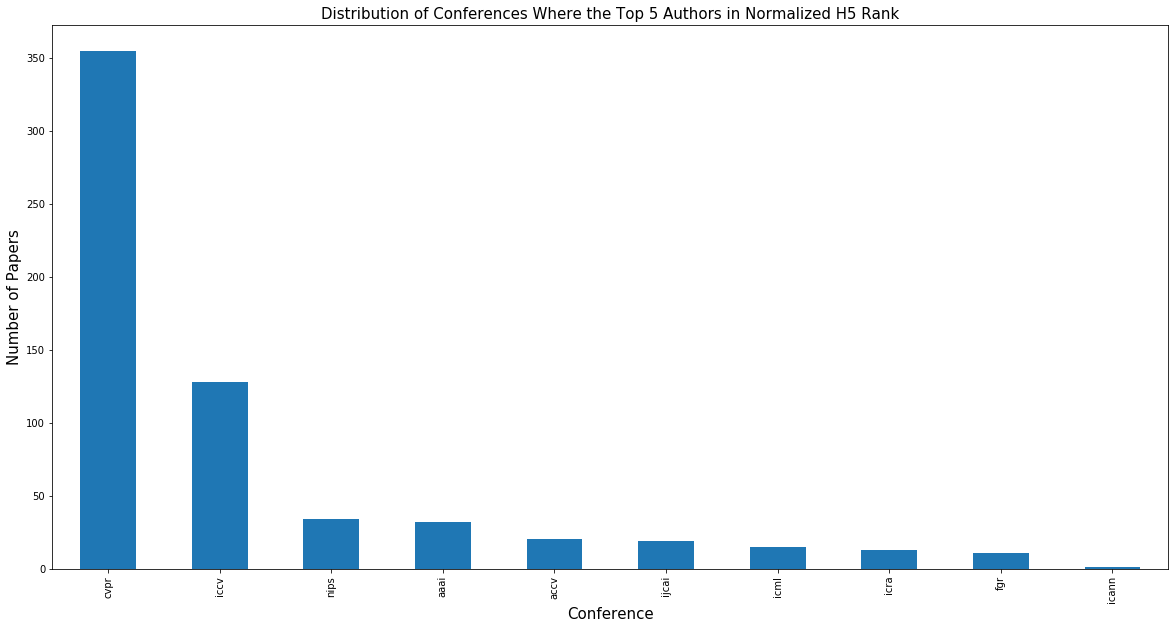

In [74]:
# see conference distribution of the papers of the top 5 normalized_h5 ranked authors
new_conf_authors[new_conf_authors['author'].isin(nor_h5_rank.head(5)['author'])] \
    .groupby('conference').count().drop(['id', 'author', 'year'], axis=1).rename(columns={'title': 'number of papers'}) \
    .sort_values(by='number of papers', ascending=False).plot.bar(figsize=(20, 10), legend=False)
plt.title('Distribution of Conferences Where the Top 5 Authors in Normalized H5 Rank', fontsize=15)
plt.xlabel('Conference', fontsize=15)
plt.ylabel('Number of Papers', fontsize=15)
plt.show()

The top ranked author in the normallized ranking is Li Fei-Fei 0001. It's odd that the name contains some number.  

We searched the name on dblp and found out that the number is for disambiguation, because there are authors who have the same name. But in this dataset, it seems like there are only Li Fei-Fei 0001.

Also, most of the papers of the top 5 authors were published on cvpr or iccv. This will cause the same problem we discussed in ```B2.5```, the ranking is biased towards authors publishing in specific field.

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [75]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [76]:
# clean text in the paper titles
clean_conf_papers = new_conf_papers.copy()
clean_conf_papers['title'] = clean_conf_papers['title'].apply(stopword_remover).apply(lowercase_all).apply(remove_punct)

In [77]:
clean_conf_papers['title'].head()

0    object recognition using feature search strate...
1                          threedimensional scene flow
2    fluid motion recovery coupling dense parametri...
3    qualitative 3d shape reconstruction using dist...
4    gplac generalizing visionbased robotic skills ...
Name: title, dtype: object

In [78]:
def detect_words(x, words_list):
    det = [word in words_list for word in x.split(' ')]
    return bool(sum(det))

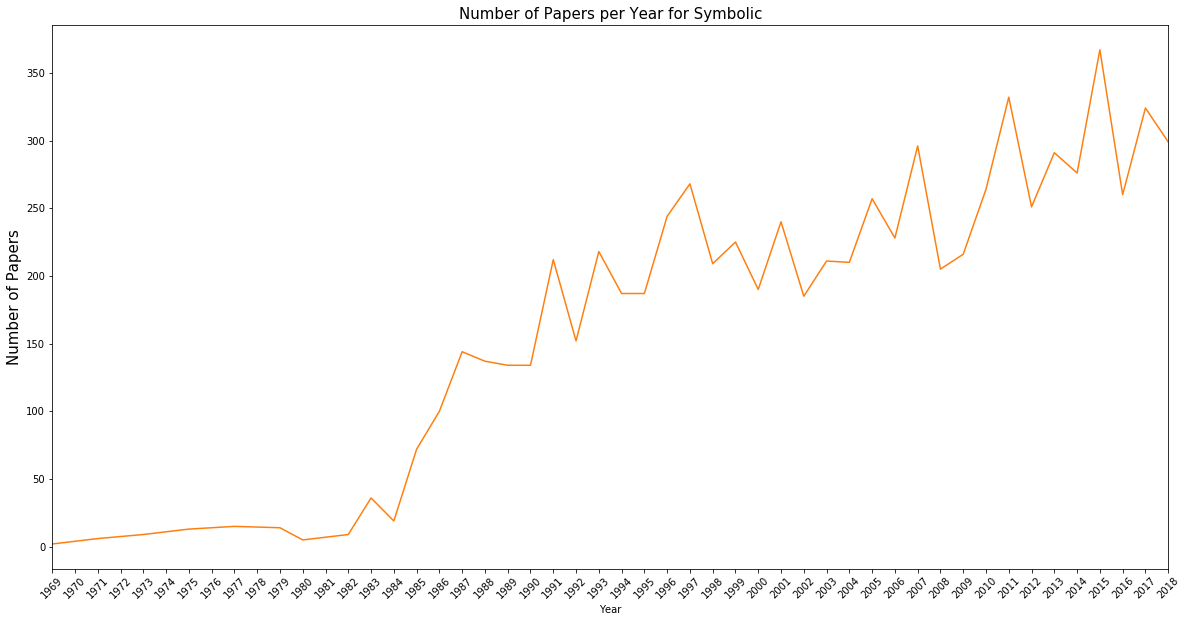

In [79]:
words_symbolic = ['logic', 'planning', 'control']
symbolic = clean_conf_papers[clean_conf_papers['title'].apply(detect_words, words_list=words_symbolic)]

# plot the number of papers per year for symbolic
symbolic['year'].value_counts().sort_index().plot(figsize=(20, 10), color='C1')
plt.title('Number of Papers per Year for Symbolic', fontsize=15)
plt.xticks(range(1969, 2019), rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Papers', fontsize=15)
plt.show()

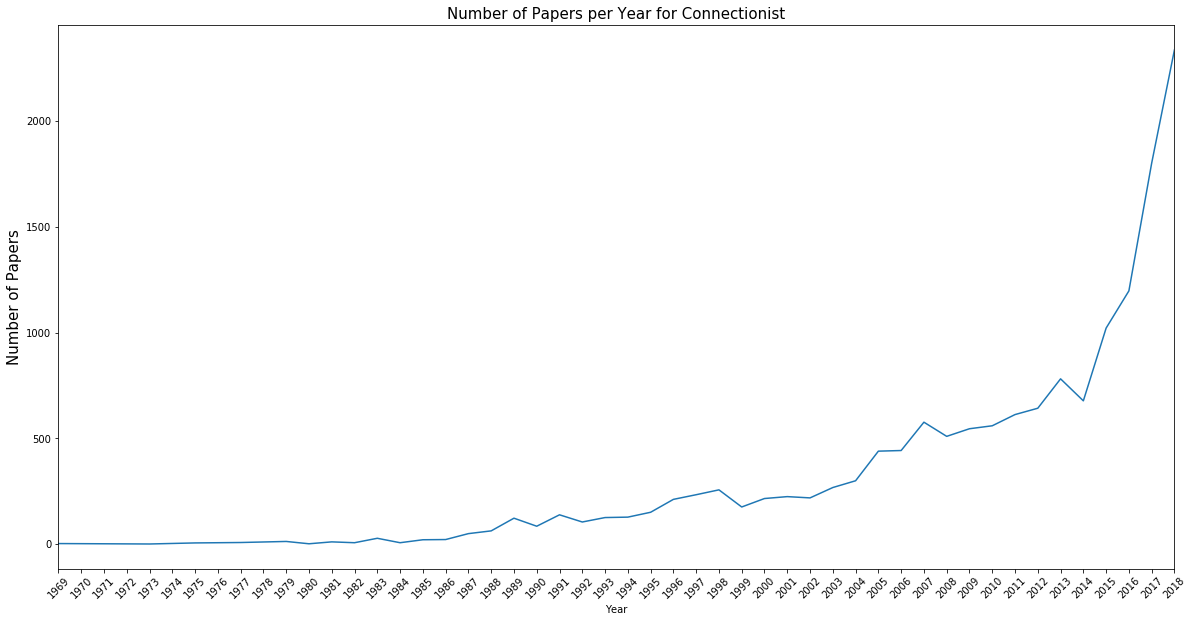

In [80]:
words_connectionist = ['deep', 'learning', 'feature', 'bayesian']
connectionist = clean_conf_papers[clean_conf_papers['title'].apply(detect_words, words_list=words_connectionist)]

# plot the number of papers per year for connectionist
connectionist['year'].value_counts().sort_index().plot(figsize=(20, 10))
plt.title('Number of Papers per Year for Connectionist', fontsize=15)
plt.xticks(range(1969, 2019), rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Papers', fontsize=15)
plt.show()

According to these two plots, we conclude that the growth of "symbolic" field has slow down and almost saturtate (the number of paper stays about the same in recent years).

As for the "connectionist" field, it is growing faster and faster, almost like an exponential growth.  

But now we only know the general trend of these two fields, if we want to discover more accurate information, we can put these two fields into a single plot.

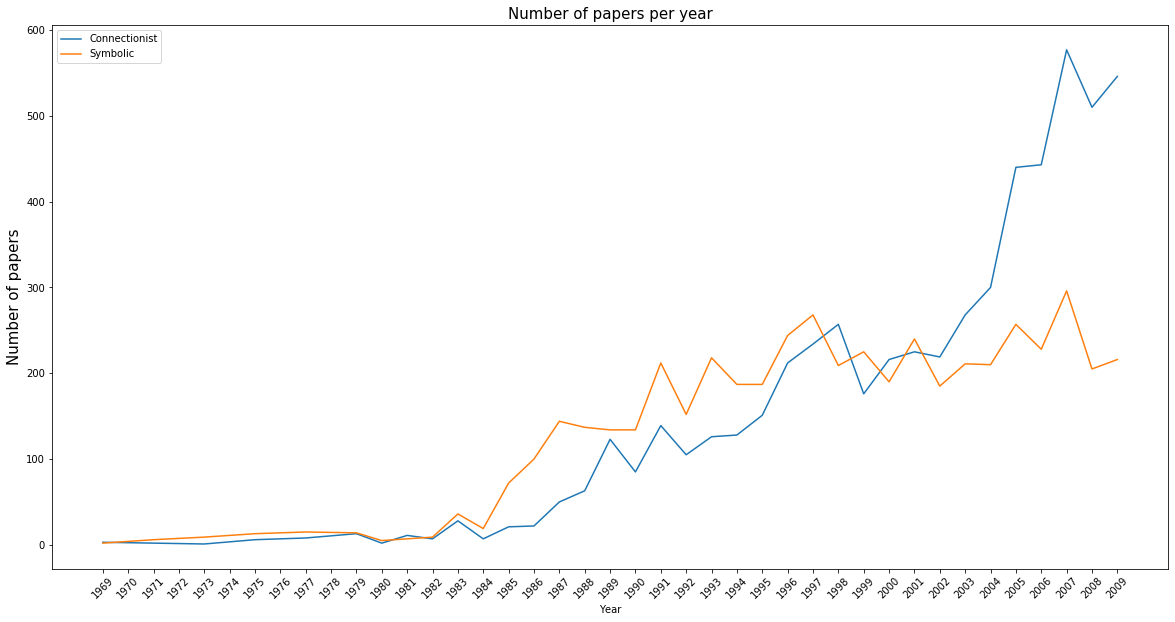

In [81]:
# we only check the number of paper before 2010, because after that connectionist simply outnumber symbolic papers
plt.figure(figsize=(20, 10))
plt.plot(connectionist['year'].value_counts().sort_index()[connectionist['year'].value_counts().sort_index().index < 2010])
plt.xticks(range(1969, 2010), rotation=45)
plt.plot(symbolic['year'].value_counts().sort_index()[symbolic['year'].value_counts().sort_index().index < 2010])
plt.title('Number of papers per year', fontsize=15)
plt.legend(['Connectionist', 'Symbolic'])
plt.xlabel('Year')
plt.ylabel('Number of papers', fontsize=15)
plt.show()

Before 1984 the popularity of these two fields were about the same. But after 1984, both fields of papers started to grow and symbolic papers grew faster than connectionist papers.  
And around 1998, the connectionist outnumbered the symbolic for the first time in a while. In the later 5 years, the number of papers were about the same.  
Finally in 2002, the connectionist regained the lead and never looked back. The number of papers of connectionist field grew super fast after 2002. As for symbolic field, the number stayed about the same after 2002.

We can also plot the normalized paper count which is the number of paper divided by the total number of paper in that year.

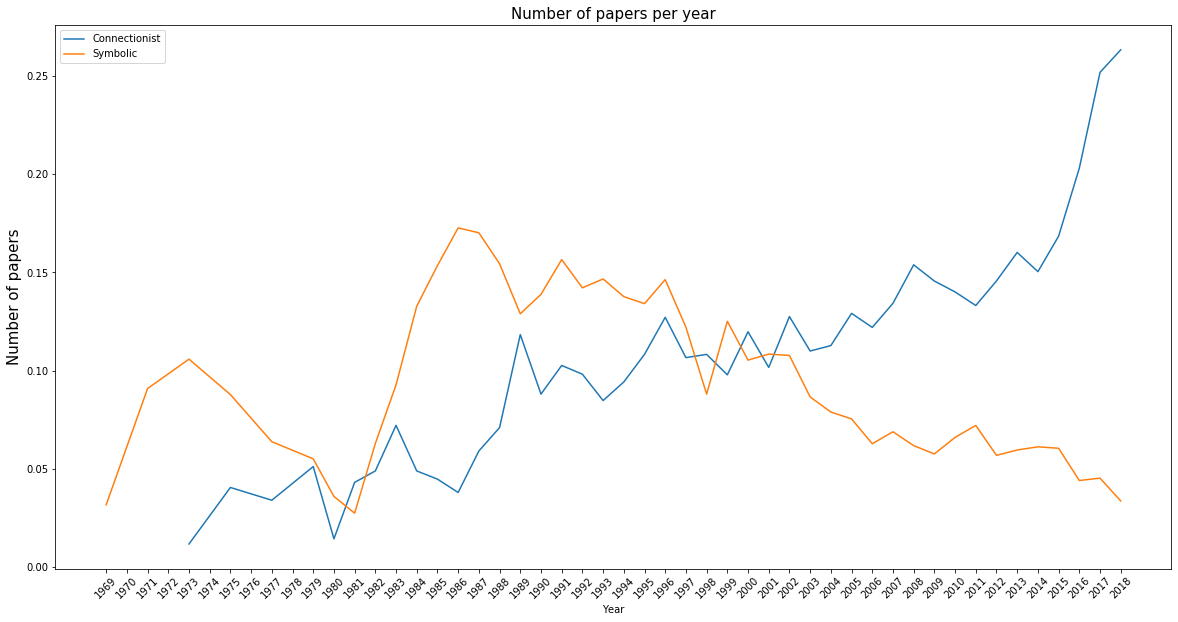

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(connectionist['year'].value_counts().sort_index() / new_conf_papers['year'].value_counts().sort_index())
plt.xticks(range(1969, 2019), rotation=45)
plt.plot(symbolic['year'].value_counts().sort_index() / new_conf_papers['year'].value_counts().sort_index())
plt.title('Number of papers per year', fontsize=15)
plt.legend(['Connectionist', 'Symbolic'])
plt.xlabel('Year')
plt.ylabel('Number of papers', fontsize=15)
plt.show()

We can see that the proportion of symbolic paper is declining, which we thought is just saturated in the previous plot.

Basically, the number of papers published per year is also increasing every year, thus, to clearly assess the popularity of a field, one needs to understand the relative importance of the field wrt to all the other existing fields.